# Computing and displaying the angular power spectrum from Galactic DM

### Import required Python modules:

In [2]:
import os
import healpy as hp
from astropy.io import fits
from matplotlib import pyplot as plt

### Create a default parameter file:
The parameter file will be found in the directory where this script is executed.

In [6]:
output = os.popen('clumpy -g5 -D').readlines()
for line in output:
    if line.find('Default parameters') != -1:
        print(line[:-1])

   Default parameters for simulation mode g5 have been written to file clumpy_params_g5.txt


### Execute CLUMPY for a Galactic fullsky map:

If ROOT plots show up, close them and finish the cell execution by clicking on ``File->Quit ROOT`` in any figure.


In [7]:
output = os.popen('clumpy -g5 -i clumpy_params_g5.txt --gSIM_IS_WRITE_GALPOWERSPECTRUM=1 --gSIM_THETA_ORTH_SIZE_DEG=d --gSIM_THETA_SIZE_DEG=360 --gSIM_HEALPIX_NSIDE=512').readlines()
for line in output:
    print(line[:-1])

 _____________________________________________________________  ___  __________ 
|   _       o     _____  _       _    _  __  __  _____ __ .    /   \       .   |
|  (_)   .       / ____|| |  o  | |  | ||  \/  ||  __ \\ \   /(     )          |
|            .  | |   . | |     | |  | || \  / || |__) |\ \_/ /\___/     o     |
| .             | |     | |   . | |  | || |\/| ||  ___/  \   /       .         |
|    __   o     | |____ | |____ | |__| || |  | || |     . | |     o         .  |
|   /  \       . \_____||______| \____/ |_|  |_||_|  o    |_|    .         _   |
|   \__/                                                               .  (_)  |
|              v3.0, git-ID 208fcae (724 commits after last tag)               |
|______________________________________________________________________________|

 ______________________________________________________________________________ 
|                                                                              |
|                          

### Grep FITS skymap output file name:

In [8]:
for line in output:
    for string in line.split():
        if string.find('.fits') != -1:
            if string.find('powerspec') != -1: outfile_cl = string
            else: outfile = string
print(outfile)
print(outfile_cl)

output/annihil_gal2D_LOS180,0_FOVdiameter360.0deg_alphaint0.12deg_nside512.fits
output/powerspec_annihil_gal2D_LOS180,0_FOVdiameter360.0deg_alphaint0.12deg_nside512.fits


### Load the data in the output file and display the skymap:

We have to extract manually the required metadata for the plotting from the the extension FITS header (is not done yet implicitly by healpy):

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = EXPLICIT
Ordering converted to RING
0.0 180.0 -180.0 180.0
The interval between parallels is 90 deg 0.00'.
The interval between meridians is 45 deg 0.00'.


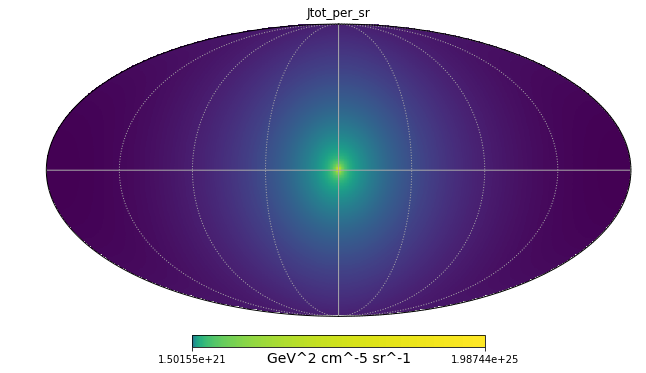

In [22]:
ext = 2 # dJ/dOmega
map = 1 # Total DM signal
data = hp.read_map(outfile, partial=True, hdu=ext, field=map-1)

hdulist = fits.open(outfile)
psi0   = hdulist[ext].header['PSI_0']
theta0 = hdulist[ext].header['THETA_0']
dtheta = hdulist[ext].header['SIZE_Y']
dtheta_orth = hdulist[ext].header['SIZE_X']
title = hdulist[ext].header['TTYPE'+str(map+1)]
units = hdulist[ext].header['TUNIT'+str(map+1)]
hdulist.close()
hp.mollview(data, norm='log', title=title, unit=units)
hp.graticule(dpar=dtheta_orth/4, dmer=dtheta/4, color='darkgrey')
plt.show()

### Plot the angular power spectrum, in case it has been computed:

In [23]:
map_cl = map # read APS corresponding to the plotted map
try:
    data_cl = hp.mrdfits(outfile_cl)[map_cl-1].flatten()
except NameError:
    print('No angular power spectrum was computed.')
hdulist_cl = fits.open(outfile_cl)
title_cl = hdulist_cl[1].header['TTYPE'+str(map_cl)]
units_cl = hdulist_cl[1].header['TUNIT'+str(map_cl)]
print(repr(hdulist_cl[1].header))
hdulist_cl.close()

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   48 / width of table in bytes                        
NAXIS2  =                 1478 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'Cl_Jtot '           / APS of total dJ/dOmega map with all components 
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'GeV^4/cm^10/sr'     / physical unit of field                         
TTYPE2  = 'Cl_Jsmooth'         / APS of dJ/dOmega map from smooth galactic halo 
TFORM2  = '1D      '        

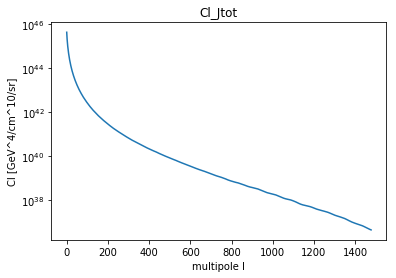

In [25]:
plt.semilogy(data_cl) 
plt.title(title_cl)
plt.xlabel('multipole l')
plt.ylabel('Cl [%s]'%units_cl);
plt.show()